In [1]:
import boto3
#import diff_classifier.aws as aws
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from diff_classifier.features import calculate_features
from os import listdir, getcwd, chdir
from os.path import isfile, join
import os
#import diff_predictor
from diff_predictor import spatial, core, data_process
from matplotlib import colors as plt_colors
import altair as alt

Using current directory for loading/saving: /mnt/batch/tasks/shared/LS_root/mounts/clusters/nance8core/code/Users/nlsschim/diff_predictor/notebooks
To change current directory, call change_dir(...)


In [3]:
workbookDir = getcwd()
print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir) # Go to current workbook Dir
chdir('..')        # Go up one
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

Current Notebook Dir: /mnt/batch/tasks/shared/LS_root/mounts/clusters/nance8core/code/Users/nlsschim/diff_predictor/notebooks
Using current directory for loading data: /mnt/batch/tasks/shared/LS_root/mounts/clusters/nance8core/code/Users/nlsschim/diff_predictor


In [5]:
# Define path to folder that contains data
dataset_path = workbookDir + '/data/features_ecm/'

# Create list of file names within the data folder
filelist = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f)) and 'feat' in f]
print(len(filelist)) # Make sure there are the right number of files

180


In [6]:
# Use diff_predictor function to create one csv with all the data
fstats_tot = data_process.generate_fullstats(dataset_path, filelist, ['HYase', 'ChABC','NT'], 'Treatment')

features_ChABC_brain_1_slice_1_vid_1.csv size: (502, 67)
features_ChABC_brain_1_slice_1_vid_2.csv size: (1734, 67)
features_ChABC_brain_1_slice_1_vid_3.csv size: (593, 67)
features_ChABC_brain_1_slice_1_vid_4.csv size: (258, 67)
features_ChABC_brain_1_slice_1_vid_5.csv size: (888, 67)
features_ChABC_brain_1_slice_2_vid_1.csv size: (1350, 67)
features_ChABC_brain_1_slice_2_vid_2.csv size: (690, 67)
features_ChABC_brain_1_slice_2_vid_3.csv size: (1257, 67)
features_ChABC_brain_1_slice_2_vid_4.csv size: (1070, 67)
features_ChABC_brain_1_slice_2_vid_5.csv size: (1097, 67)
features_ChABC_brain_1_slice_3_vid_1.csv size: (1141, 67)
features_ChABC_brain_1_slice_3_vid_2.csv size: (1307, 67)
features_ChABC_brain_1_slice_3_vid_3.csv size: (650, 67)
features_ChABC_brain_1_slice_3_vid_4.csv size: (1594, 67)
features_ChABC_brain_1_slice_3_vid_5.csv size: (1212, 67)
features_ChABC_brain_2_slice_1_vid_1.csv size: (1133, 67)
features_ChABC_brain_2_slice_1_vid_2.csv size: (2291, 67)
features_ChABC_brain

features_NT_brain_2_slice_2_vid_5.csv size: (2100, 67)
features_NT_brain_2_slice_3_vid_1.csv size: (562, 67)
features_NT_brain_2_slice_3_vid_2.csv size: (853, 67)
features_NT_brain_2_slice_3_vid_3.csv size: (817, 67)
features_NT_brain_2_slice_3_vid_4.csv size: (598, 67)
features_NT_brain_2_slice_3_vid_5.csv size: (1062, 67)
features_NT_brain_3_slice_1_vid_1.csv size: (2917, 67)
features_NT_brain_3_slice_1_vid_2.csv size: (2268, 67)
features_NT_brain_3_slice_1_vid_3.csv size: (3859, 67)
features_NT_brain_3_slice_1_vid_4.csv size: (3271, 67)
features_NT_brain_3_slice_1_vid_5.csv size: (3054, 67)
features_NT_brain_3_slice_2_vid_1.csv size: (840, 67)
features_NT_brain_3_slice_2_vid_2.csv size: (572, 67)
features_NT_brain_3_slice_2_vid_3.csv size: (886, 67)
features_NT_brain_3_slice_2_vid_4.csv size: (364, 67)
features_NT_brain_3_slice_2_vid_5.csv size: (893, 67)
features_NT_brain_3_slice_3_vid_1.csv size: (596, 67)
features_NT_brain_3_slice_3_vid_2.csv size: (378, 67)
features_NT_brain_3_s

In [6]:
# Look at sample of data
fstats_tot.head()

,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,...,Mean Mean_Intensity,Std Mean_Intensity,Mean SN_Ratio,Std SN_Ratio,Mean Deff1,Std Deff1,Mean Deff2,Std Deff2,Treatment,Video Number
0,0.0,0.816365,13.058749,2.551438,0.298735,0.541468,0.045251,1.580388,0.367244,0.055654,...,NaN,NaN,0.820048,0.032337,10.442310,1.272833,NaN,NaN,ChABC,0
1,1.0,1.161703,6.079955,2.095601,0.822425,0.220988,0.227570,2.116028,0.527416,0.124585,...,NaN,NaN,1.073503,0.216005,14.047563,0.000000,NaN,NaN,ChABC,0
2,2.0,0.917237,23.212111,1.744405,0.985075,0.061313,0.496155,4.052659,0.753248,0.083099,...,NaN,NaN,1.073503,0.216005,14.047563,0.000000,NaN,NaN,ChABC,0
3,3.0,0.118077,82.989569,1.882246,0.144911,0.669754,0.019753,1.159049,0.137224,0.078294,...,NaN,NaN,0.887472,0.073740,19.066433,12.801049,NaN,NaN,ChABC,0
4,4.0,1.157632,8.442376,3.135845,0.572443,0.372241,0.110529,1.324925,0.245240,0.058218,...,NaN,NaN,0.887472,0.073740,19.066433,12.801049,NaN,NaN,ChABC,0


In [57]:
# deff1_nozero = fstats_tot[fstats_tot['Deff1'] > 0]
# deff1_nozero['log Deff1'] = np.log10(deff1_nozero['Deff1'])

ChABC data points: 61449
HYase data points: 61745
NT data points: 60989


Text(0.5, 1.0, 'Diffusion Coefficients at 0.33s of Treatment Groups')

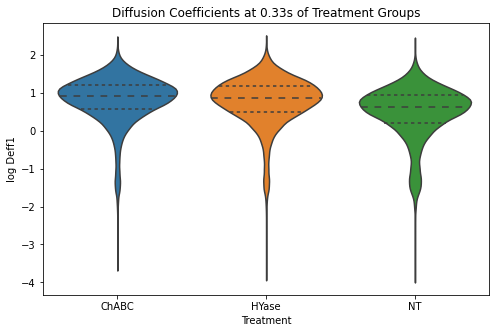

In [21]:
def generate_violinplot(x, y, data, quartile_style='quartile'):
    """
    
    """
    
    #write code to see how many values are in each class
    
    
    
    data = data[data[y] > 0].copy()
    y_log = 'log ' + y
    
    for i in data[x].unique():
        print(f'{i} data points: {len(data[data[x] ==i])}')
    #y_vals = np.log10(data[y].copy())
    #print(y_vals)
    
    data[y_log] = (np.log10(data[y]))
    fig = plt.figure(figsize=(8,5))
    sns.violinplot(x=x, y=y_log, data=data, inner=quartile_style)
    
    
    
generate_violinplot('Treatment', 'Deff1', fstats_tot, 'quartile')
plt.title('Diffusion Coefficients at 0.33s of Treatment Groups')

Number of ChABC data points is 1378
Number of HYase data points is 1476
Number of NT data points is 3279


Text(0.5, 1.0, 'Diffusion Coefficients at 3.3s of Treatment Groups')

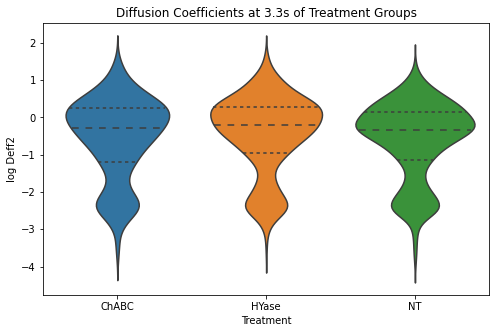

In [20]:
generate_violinplot('Treatment', 'Deff2', fstats_tot)
plt.title('Diffusion Coefficients at 3.3s of Treatment Groups')

Load in another dataset with deff2 at a different time

In [40]:
# Define path to folder that contains data
dataset_path = workbookDir + '/data/0.8s_deff2_features_ecm/'

# Create list of file names within the data folder
filelist = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f)) and 'feat' in f]
print(len(filelist)) # Make sure there are the right number of files

180


In [41]:
fstats_tot = data_process.generate_fullstats(dataset_path, filelist, ['HYase', 'ChABC','NT'], 'Treatment')

features_ChABC_brain_1_slice_1_vid_1.csv size: (502, 67)
features_ChABC_brain_1_slice_1_vid_2.csv size: (1734, 67)
features_ChABC_brain_1_slice_1_vid_3.csv size: (593, 67)
features_ChABC_brain_1_slice_1_vid_4.csv size: (258, 67)
features_ChABC_brain_1_slice_1_vid_5.csv size: (888, 67)
features_ChABC_brain_1_slice_2_vid_1.csv size: (1350, 67)
features_ChABC_brain_1_slice_2_vid_2.csv size: (690, 67)
features_ChABC_brain_1_slice_2_vid_3.csv size: (1257, 67)
features_ChABC_brain_1_slice_2_vid_4.csv size: (1070, 67)
features_ChABC_brain_1_slice_2_vid_5.csv size: (1097, 67)
features_ChABC_brain_1_slice_3_vid_1.csv size: (1141, 67)
features_ChABC_brain_1_slice_3_vid_2.csv size: (1307, 67)
features_ChABC_brain_1_slice_3_vid_3.csv size: (650, 67)
features_ChABC_brain_1_slice_3_vid_4.csv size: (1594, 67)
features_ChABC_brain_1_slice_3_vid_5.csv size: (1212, 67)
features_ChABC_brain_2_slice_1_vid_1.csv size: (1133, 67)
features_ChABC_brain_2_slice_1_vid_2.csv size: (2291, 67)
features_ChABC_brain

features_NT_brain_2_slice_2_vid_5.csv size: (2100, 67)
features_NT_brain_2_slice_3_vid_1.csv size: (562, 67)
features_NT_brain_2_slice_3_vid_2.csv size: (853, 67)
features_NT_brain_2_slice_3_vid_3.csv size: (817, 67)
features_NT_brain_2_slice_3_vid_4.csv size: (598, 67)
features_NT_brain_2_slice_3_vid_5.csv size: (1062, 67)
features_NT_brain_3_slice_1_vid_1.csv size: (2917, 67)
features_NT_brain_3_slice_1_vid_2.csv size: (2268, 67)
features_NT_brain_3_slice_1_vid_3.csv size: (3859, 67)
features_NT_brain_3_slice_1_vid_4.csv size: (3271, 67)
features_NT_brain_3_slice_1_vid_5.csv size: (3054, 67)
features_NT_brain_3_slice_2_vid_1.csv size: (840, 67)
features_NT_brain_3_slice_2_vid_2.csv size: (572, 67)
features_NT_brain_3_slice_2_vid_3.csv size: (886, 67)
features_NT_brain_3_slice_2_vid_4.csv size: (364, 67)
features_NT_brain_3_slice_2_vid_5.csv size: (893, 67)
features_NT_brain_3_slice_3_vid_1.csv size: (596, 67)
features_NT_brain_3_slice_3_vid_2.csv size: (378, 67)
features_NT_brain_3_s

ChABC data points: 22468
HYase data points: 22667
NT data points: 28179


(-6.0, 3.0)

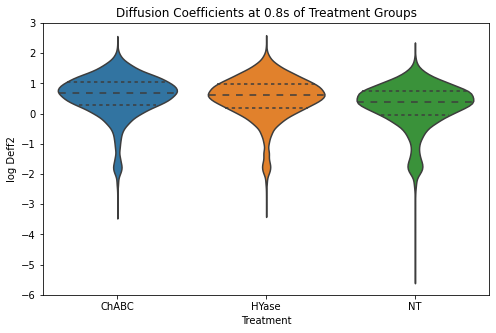

In [47]:
generate_violinplot('Treatment', 'Deff2', fstats_tot)
plt.title('Diffusion Coefficients at 0.8s of Treatment Groups')
plt.ylim([-6,3])